<a href="https://colab.research.google.com/github/jeffjohnsunil/CreditCardApplication/blob/main/Test_Notebook_Lumiere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/illustristng/illustris_python.git

Cloning into 'illustris_python'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 229 (delta 141), reused 208 (delta 124), pack-reused 0
Receiving objects: 100% (229/229), 49.11 KiB | 761.00 KiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
!pip install illustris_python/

Processing ./illustris_python
  Preparing metadata (setup.py) ... done
  Created wheel for illustris-python: filename=illustris_python-1.0.0-py3-none-any.whl size=15035 sha256=7de116066400d1a59cd2063df8138b768cf545d9544c6d01fc39c34b46f8b2be
  Stored in directory: /tmp/pip-ephem-wheel-cache-fzm4gxpr/wheels/0e/16/b1/b1de5ef4b9504a03f92750e09d1257935e58d47341f8af6081
Successfully built illustris-python


In [3]:
%cd Illustris-3/output/groups_135

/content/Illustris-3/output/groups_135


In [4]:
!wget -nd -nc -nv -e robots=off -l 1 -r -A hdf5 --content-disposition --header="API-Key: 76bd7d5d36ff5c421091d708c19b7491" "http://www.tng-project.org/api/Illustris-3/files/groupcat-135/?format=api"

2023-10-08 15:00:32 URL:https://www.tng-project.org/api/Illustris-3/files/groupcat-135/?format=api [8746/8746] -> "index.html?format=api.tmp" [1]
2023-10-08 15:00:32 URL:https://www.tng-project.org/ [12799/12799] -> "index.html.tmp" [1]
2023-10-08 15:00:32 URL:https://www.tng-project.org/about/ [36876/36876] -> "index.html.tmp" [1]
2023-10-08 15:00:32 URL:https://www.tng-project.org/people/ [13229/13229] -> "index.html.tmp" [1]
2023-10-08 15:00:33 URL:https://www.tng-project.org/results/ [440781/440781] -> "index.html.tmp" [1]
2023-10-08 15:00:33 URL:https://www.tng-project.org/media/ [58966/58966] -> "index.html.tmp" [1]
2023-10-08 15:00:34 URL:https://www.tng-project.org/data/ [43858/43858] -> "index.html.tmp" [1]
2023-10-08 15:00:34 URL:https://www.tng-project.org/explore/ [3945/3945] -> "index.html.tmp" [1]
2023-10-08 15:00:34 URL:https://www.tng-project.org/users/login/ [5424/5424] -> "index.html.tmp" [1]
2023-10-08 15:00:34 URL:https://www.tng-project.org/users/login/ [5424/5424]

In [5]:
%cd ~
%cd ..
%cd content

/root
/
/content


In [6]:
import illustris_python as il
basePath = './Illustris-3/output/'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [7]:
subhalos.keys()
subhalos['SubhaloMass'].shape

(121209,)

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

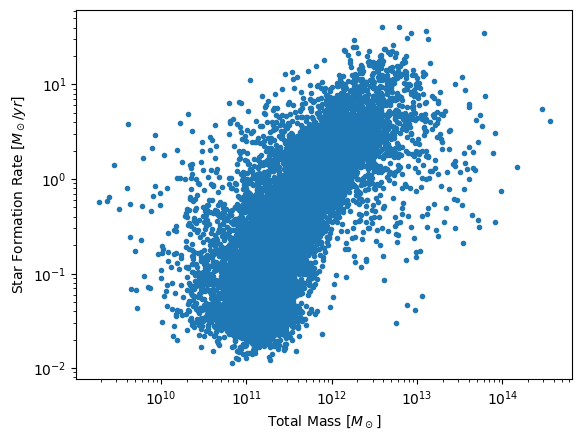

In [8]:
import matplotlib.pyplot as plt
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

In [9]:
%cd Illustris-3/output/snapdir_135
!wget -nd -nc -nv -e robots=off -l 1 -r -A hdf5 --content-disposition --header="API-Key: 76bd7d5d36ff5c421091d708c19b7491" "http://www.tng-project.org/api/Illustris-3/files/snapshot-135/?format=api"

/content/Illustris-3/output/snapdir_135
2023-10-08 15:00:46 URL:http://www.tng-project.org/api/Illustris-3/files/snapshot-135/?format=api [14130/14130] -> "index.html?format=api.tmp" [1]
2023-10-08 15:00:46 URL:http://www.tng-project.org/ [12799/12799] -> "index.html.tmp" [1]
2023-10-08 15:00:47 URL:http://www.tng-project.org/about/ [36876/36876] -> "index.html.tmp" [1]
2023-10-08 15:00:47 URL:http://www.tng-project.org/people/ [13229/13229] -> "index.html.tmp" [1]
2023-10-08 15:00:47 URL:http://www.tng-project.org/results/ [440781/440781] -> "index.html.tmp" [1]
2023-10-08 15:00:48 URL:http://www.tng-project.org/media/ [58966/58966] -> "index.html.tmp" [1]
2023-10-08 15:00:48 URL:http://www.tng-project.org/data/ [43858/43858] -> "index.html.tmp" [1]
2023-10-08 15:00:48 URL:http://www.tng-project.org/explore/ [3945/3945] -> "index.html.tmp" [1]
2023-10-08 15:00:48 URL:http://www.tng-project.org/users/login/ [5424/5424] -> "index.html.tmp" [1]
2023-10-08 15:00:49 URL:http://www.tng-proj

In [10]:
%cd ~

/root


In [11]:
%cd ..
%cd content

/
/content


Text(0, 0.5, 'y [ckpc/h]')

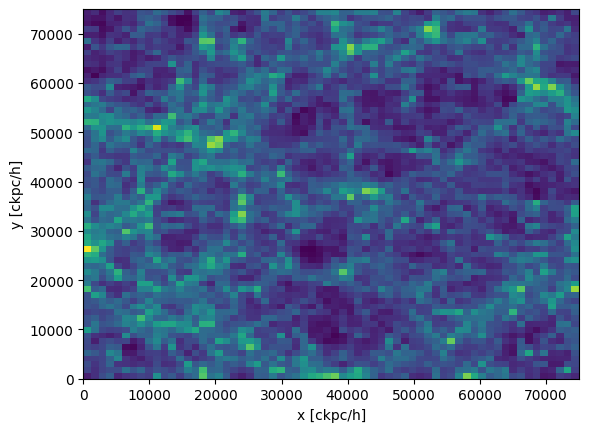

In [12]:
import numpy as np
fields = ['Masses']
gas_mass = il.snapshot.loadSubset(basePath,135,'gas',fields=fields)

import matplotlib as mpl
dm_pos = il.snapshot.loadSubset(basePath,135,'dm',['Coordinates']);
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=64);
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')

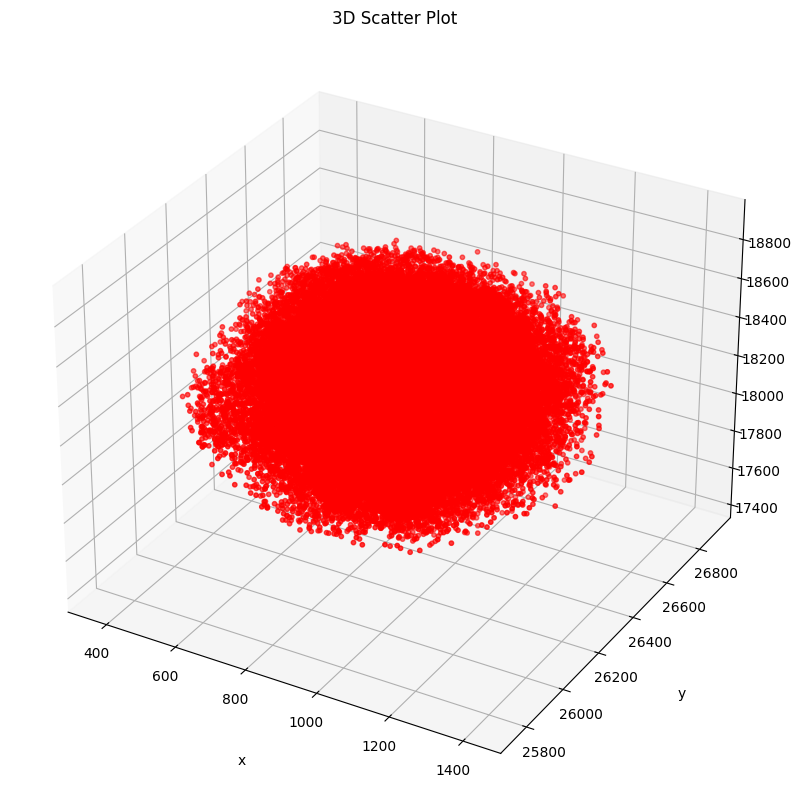

In [13]:
x = dm_pos[:,0][1:200000]
y = dm_pos[:,1][1:200000]
z = dm_pos[:,2][1:200000]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 10)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()